/Users/Binod/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Binod/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/Binod/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


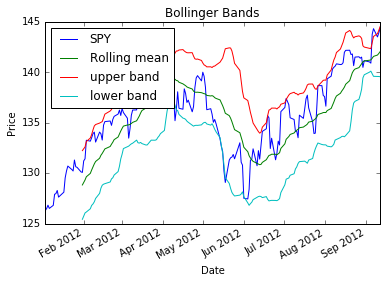

None

In [1]:
"""Bollinger Bands."""
from IPython.display import display
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + rstd * 2
    lower_band = rm - rstd *2
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    display(plt.show())
    


if __name__ == "__main__":
    test_run()


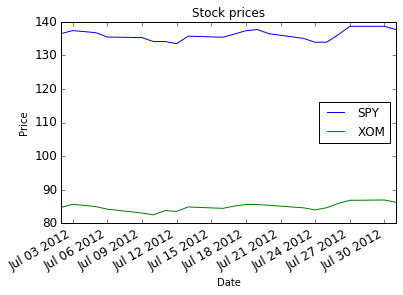

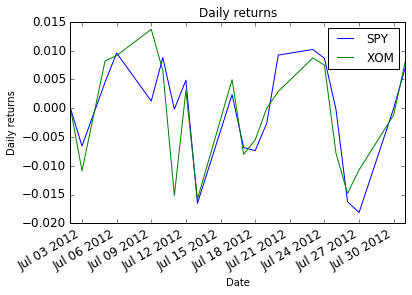

In [4]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    #return df.pct_change(1)
    daily_returns = df.copy() # copy df to match size and cloumn
    daily_returns[1:] = df[:-1].values / df[1:] - 1
    daily_returns.ix[0,:] = 0 # set row 0 to 0
    return daily_returns


def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


In [ ]:
# Cumulative Returns